In [17]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

## Get Stock Data

In [24]:
pltr = pdr.get_data_yahoo('PLTR')
day = np.arange(1,len(pltr) + 1)
pltr['day'] = day
pltr.drop(columns=['Adj Close','Volume'],inplace=True)
pltr = pltr[['day','Open','High','Low','Close']]
pltr.head()

,day,Open,High,Low,Close
Date,,,,,
2020-09-30,1,10.00,11.41,9.11,9.50
2020-10-01,2,9.69,10.10,9.23,9.46
2020-10-02,3,9.06,9.28,8.94,9.20
2020-10-05,4,9.43,9.49,8.92,9.03
2020-10-06,5,9.04,10.18,8.90,9.90


## Add moving averages to the data frame

In [37]:
pltr['9-day'] = pltr['Close'].rolling(9).mean()
pltr['21-day'] = pltr['Close'].rolling(21).mean()
pltr[19:25]

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2020-11-25,41,23.959999,29.750000,23.690001,29.049999,19.835556,NaN,1,0.198493,0.198493,0.0
2020-11-27,42,31.190001,33.500000,26.120001,27.660000,21.153333,16.368571,1,-0.049031,-0.049031,0.0
2020-11-30,43,28.240000,30.150000,24.110001,27.110001,22.395555,17.147619,1,-0.020085,-0.020085,0.0
2020-12-01,44,28.090000,28.139999,24.450001,25.670000,23.264444,17.887619,1,-0.054580,-0.054580,0.0
2020-12-02,45,22.240000,23.400000,21.150000,22.510000,23.776667,18.457619,1,-0.131363,-0.131363,0.0
2020-12-03,46,23.549999,25.620001,23.500000,24.030001,24.337778,19.101905,1,0.065343,0.065343,0.0


## Add Signal

In [38]:
pltr['signal'] = np.where(pltr['9-day'] > pltr['21-day'], 1 ,0)
pltr['signal'] = np.where(pltr['9-day'] < pltr['21-day'], -1 ,pltr['signal'])
pltr.dropna(inplace=True)
pltr.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2020-11-27,42,31.190001,33.500000,26.120001,27.660000,21.153333,16.368571,1,-0.049031,-0.049031,0.0
2020-11-30,43,28.240000,30.150000,24.110001,27.110001,22.395555,17.147619,1,-0.020085,-0.020085,0.0
2020-12-01,44,28.090000,28.139999,24.450001,25.670000,23.264444,17.887619,1,-0.054580,-0.054580,0.0
2020-12-02,45,22.240000,23.400000,21.150000,22.510000,23.776667,18.457619,1,-0.131363,-0.131363,0.0
2020-12-03,46,23.549999,25.620001,23.500000,24.030001,24.337778,19.101905,1,0.065343,0.065343,0.0


## Calculate Instantaneous returns/system returns

In [39]:
pltr['return'] = np.log(pltr['Close']).diff()
pltr['system_return'] = pltr['signal'] * pltr['return']
pltr['entry'] = pltr.signal.diff()
pltr.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2020-11-27,42,31.190001,33.500000,26.120001,27.660000,21.153333,16.368571,1,NaN,NaN,NaN
2020-11-30,43,28.240000,30.150000,24.110001,27.110001,22.395555,17.147619,1,-0.020085,-0.020085,0.0
2020-12-01,44,28.090000,28.139999,24.450001,25.670000,23.264444,17.887619,1,-0.054580,-0.054580,0.0
2020-12-02,45,22.240000,23.400000,21.150000,22.510000,23.776667,18.457619,1,-0.131363,-0.131363,0.0
2020-12-03,46,23.549999,25.620001,23.500000,24.030001,24.337778,19.101905,1,0.065343,0.065343,0.0


## Plot Trades on time series

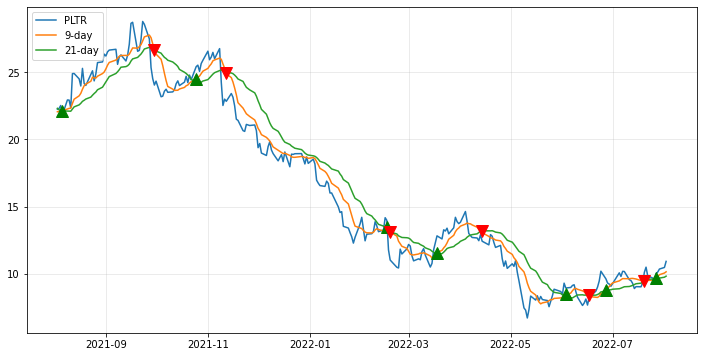

In [40]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha=.3)
plt.plot(pltr.iloc[-252:]['Close'], label = 'PLTR')
plt.plot(pltr.iloc[-252:]['9-day'], label = '9-day')
plt.plot(pltr.iloc[-252:]['21-day'], label = '21-day')
plt.plot(pltr[-252:].loc[pltr.entry == 2].index, pltr[-252:]['9-day'][pltr.entry == 2], '^', color='g', markersize = 12)
plt.plot(pltr[-252:].loc[pltr.entry == -2].index, pltr[-252:]['21-day'][pltr.entry == -2], 'v', color='r', markersize = 12)
plt.legend(loc=2)


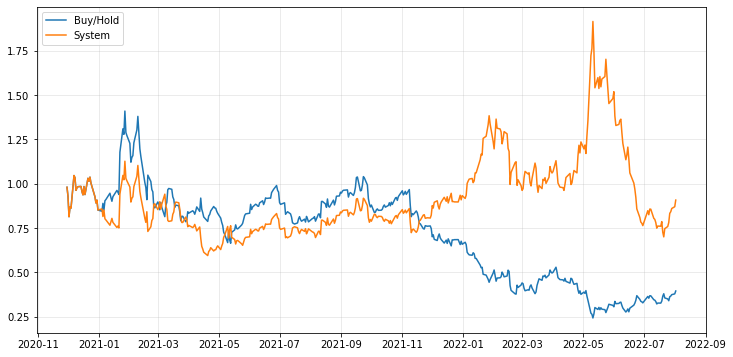

In [41]:
plt.plot(np.exp(pltr['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(pltr['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True,alpha=.3)